<a href="https://colab.research.google.com/github/joao-albc/Bootcamp-Alura-Data-Science-Aplicada-2-Producao-Hospitalar/blob/main/Bootcamp-Alura-Data-Science-Aplicada-2-Producao-Hospitalar/Projetos/Projeto_01/Projeto_Mod_01_Alura_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Projeto Bootcamp ALURA Módulo 1:</h1>
João Alfredo Barbosa da Costa

<h2>Objetivo:</h2>

*Neste projeto queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação referente a base de dados de produção hospitalar, seja número de internação, óbito, dias de permanência, taxa de mortalidade ou outros de sua preferência.*

*Utilizando mais dados, teremos mais possibilidades de análise, por exemplo, identificar se o aumento de gastos e internações estão crescendo juntos. Assim, explore o máximo que conseguir dos dados e nos conte suas hipóteses e análises através desse projeto.*

Alura (*https://bootcamps.alura.com.br/course/projeto-modulo-01/task/74219*)

<h2>Escopo proposto:

**Módulo 01: Python e pandas para análise de dados reais**

*Neste módulo vamos aprender como utilizar **Python**, **Pandas** e **Matplotlib** para explorar os dados financeiros do SUS, mais precisamente os gastos por Unidade Federativa ao longo dos anos. Os desafios se iniciam na aquisição dos dados em uma plataforma do governo e seus possíveis problemas, passando pelo leitura destes dados com o Pandas até a criação de hipóteses na área da saúde, que sempre devem ser cuidadosas, simulando os desafios diários de uma pessoa cientista de dados.*

Alura (*https://bootcamps.alura.com.br/bootcamp-data-science-aplicada-2*)

## Dados:

Foi dada a opção de usar os dados de produção hospitalar, fosse número de internação, óbito, dias de permanência, taxa de mortalidade ou outros. Os dados ficam disponíveis no **portal da saúde do SUS** *(http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)*

Fiz a escolha de selecionar os dados por número de óbitos. Estes, podem ser baixados no formato **.CSV**

##Importação de bibliotecas

In [18]:
#@title
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format

## Preparação dos dados

In [19]:
#@title
obitos = pd.read_csv('https://raw.githubusercontent.com/joao-albc/Bootcamp-Alura-Data-Science-Aplicada-2-Producao-Hospitalar/main/Projetos/Projeto_01/Dados/A221901189_28_143_208.csv', encoding="ISO-8859-1", sep=";", skiprows = 3, skipfooter=12)
# O skiprows é usado para pular o cabeçalho

obitos.set_index('Unidade da Federação', inplace = True)
# obitos.drop('Total', axis = 1, inplace = True)
obitos.drop('2021/Abr', axis = 1, inplace = True)
obitos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,438,413,606,37759
12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18950
13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1618,1891,66217
14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,47,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12669
15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,727,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1071,1172,1285,1445,140437
16 Amapá,65,81,42,51,34,42,52,52,59,83,58,84,68,68,48,91,64,77,69,75,82,71,66,76,90,80,68,80,43,84,78,50,73,54,76,70,81,79,52,75,...,54,83,80,96,105,96,84,86,77,89,91,82,116,72,110,116,108,90,85,87,75,96,96,76,97,70,59,84,187,179,216,149,80,76,63,146,110,136,205,13185
17 Tocantins,141,210,253,199,173,216,229,202,189,164,195,196,165,247,168,171,206,202,218,218,210,242,200,161,229,223,256,205,211,202,233,222,187,241,226,209,216,233,206,241,...,218,173,228,168,167,155,195,213,170,178,168,130,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,285,233,257,314,52,34802
21 Maranhão,202,320,308,335,374,307,363,409,354,319,216,330,297,362,350,359,407,358,332,438,434,364,373,445,407,398,486,443,444,457,483,437,422,429,472,381,465,447,574,515,...,947,861,874,979,980,950,885,880,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827,940,909,970,900,1826,1933,1491,1138,1051,1110,1063,859,1066,1150,1856,115469
22 Piauí,224,337,337,277,368,358,368,294,358,363,355,276,332,334,312,407,350,484,337,370,266,341,323,380,419,386,390,414,379,347,291,300,304,295,379,350,358,343,432,371,...,530,507,553,562,578,518,584,463,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537,558,503,469,434,477,566,839,918,654,713,559,578,675,738,697,76712


In [20]:
#@title
investimento = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/joao-albc/Bootcamp-Alura-Data-Science-Aplicada-2-Producao-Hospitalar/main/Projetos/Projeto_01/Dados/A171352189_28_143_208.csv',skiprows = 3,skipfooter= 12, encoding="ISO-8859-1",thousands=".", decimal=",",sep=";"))
investimento.set_index('Unidade da Federação', inplace = True)
# investimento.drop('Total', axis = 1, inplace = True)
investimento

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,291

Substituição de valores em relação ao **12 Acre** no em **2009/Set**

A ideia é que os values sejam substituídos pelo valor média



Óbitos

In [21]:
#@title
#variável para receber somente os valores do Estado (index)
n = obitos.loc['12 Acre'].values
#insere o valor com a média da array sem contar o valor ausente
obitos[obitos.columns[20]][1] =int(np.mean(np.delete(n,20)))

obitos = obitos.astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Investimento

In [22]:
#@title
#variável para receber somente os valores do Estado (index)
n = investimento.loc['12 Acre'].values
#insere o valor com a média da array sem contar o valor ausente
investimento[investimento.columns[20]][1] = float(np.mean(np.delete(n,20)))

investimento = investimento.astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###Inserir Região

In [23]:
#@title
def insert_regiao(df):

  estados = df.index[:]
  regiao = []
  c = 0

  for i in estados:
    num = estados[c][0:2]
    if int(num) >= 11 and int(num) <= 17:
      regiao.append('Norte')
    elif int(num) >= 21 and int(num) <= 29:
      regiao.append('Nordeste')
    elif int(num) >= 31 and int(num) <= 35:
      regiao.append('Sudeste')
    elif int(num) >= 41 and int(num) <= 43:
      regiao.append('Sul')
    elif int(num) >= 50 and int(num) <= 53:
      regiao.append('Centro-Oeste')
    c+=1

  df['Região'] = regiao

  return df

In [24]:
#@title
investimento = insert_regiao(investimento)
obitos = insert_regiao(obitos)

###Inserir mês e ano

In [25]:
#@title
def insert_month_year(x):
  df = x
  meses = []
  for i in df.T.index:
    meses.append(re.search('\w*[a-zA-Z]',str(i)).group())

  ano = []
  for i in df.T.index:
    ano.append((re.search('\d*',str(i)).group()))

  df = df.T
  

  df['Mes'] = meses

  df['Ano'] = ano
  
  return df.drop(index='Total', axis =1)

In [26]:
#@title
investimento.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68,Norte
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,5660987.80,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47,Norte
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05,Norte
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2881281.13,2

## Funções

In [27]:
#@title
def graficos_regiao(nome_regiao):
  c = 0
  estados_regiao = list(investimento.index.where(investimento['Região'] == str(nome_regiao)).dropna())
  fig, ax = plt.subplots(1,int(len(estados_regiao)), figsize=(40,3), sharey=True)
  for estado in estados_regiao:
    obts = obitos.T[:-2][estado].values
    inv = investimento.T[:-2][estado].values
    ax[c].plot(investimento.T[:-2][estado].keys(), np.array(inv, dtype='float') / np.sum(inv, dtype='float') *100, label='Investimento')
    ax[c].plot(obitos.T[:-2][estado].keys(), np.array(obts, dtype='float') / np.sum(obts, dtype='float') *100, label='Óbitos')    

    ax[c].set_xticks(investimento.T[:-2][estado].keys()[-2:0:-36])
    ax[c].set_title(estado)
    ax[c].legend()
    c+=1

In [28]:
#@title
def graficos_estado(estado):
  c = 0
  fig, ax = plt.subplots(figsize=(16,5))
  obts = obitos.T[:-2][estado].values
  inv = investimento.T[:-2][estado].values
  ax.plot(investimento.T[:-2][estado].keys(), np.array(inv, dtype='float') / np.sum(inv, dtype='float') *100, label='Investimento')
  ax.plot(obitos.T[:-2][estado].keys(), np.array(obts, dtype='float') / np.sum(obts, dtype='float') *100, label='Óbitos')    

  ax.set_xticks(investimento.T[:-2][estado].keys()[-2:0:-36])
  ax.set_title(estado)
  ax.legend()
  
  return ax

In [29]:
#@title
def mes_a_mes(estado):
  n = pd.DataFrame()
  n['mês'] = obitos.T[:-2].index
  n['obts'] = obitos.T[:-2][estado].values
  n['obts %'] = obitos.T[:-2][estado].values / np.sum(obitos.T[:-2][estado].values )
  n['inv'] = investimento.T[:-2][estado].values
  n['inv %'] = investimento.T[:-2][estado].values / np.sum(investimento.T[:-2][estado].values)
  return n

In [30]:
#@title
mes_a_mes('17 Tocantins').tail(10)

,mês,obts,obts %,inv,inv %
149,2020/Jun,283,0.01,7424637.88,0.01
150,2020/Jul,363,0.01,9155572.36,0.01
151,2020/Ago,333,0.01,8390267.72,0.01
152,2020/Set,341,0.01,8729632.49,0.01
153,2020/Out,299,0.01,7770885.66,0.01
154,2020/Nov,285,0.01,527840.46,0.00
155,2020/Dez,233,0.01,675277.05,0.00
156,2021/Jan,257,0.01,419553.49,0.00
157,2021/Fev,314,0.01,319160.87,0.00
158,2021/Mar,52,0.00,1357751.33,0.00


<h2>Análises

### Análises por região

**Explorar dados por região**

Podemos observar que existe um equilíbrio entre a média de investimento total e o número de óbitos por cada região do país. Na relação entre óbitos e investimentos, a região com maior sobra foi a Sul, com + 2.2% investidos. Por outro lado, o Sudeste registrou uma diferença de -4%.

In [31]:
#@title
tabela_regiao = pd.DataFrame(obitos.groupby(['Região']).sum().T.sum().sort_values(), columns=['Óbitos.'])
tabela_regiao['% obt.'] = (obitos.groupby(['Região']).sum().T.sum().sort_values() / obitos[obitos.columns[0:-1]].sum().sum().round(4)*100)
tabela_regiao['Investimento'] = investimento.groupby(['Região']).sum().T.sum().sort_values()
tabela_regiao['% inv.'] = (investimento.groupby(['Região']).sum().T.sum().sort_values() / investimento.groupby(['Região']).sum().sum().sum())*100
tabela_regiao['% dif.'] = tabela_regiao['% inv.'] - tabela_regiao['% obt.']
tabela_regiao

,Óbitos.,% obt.,Investimento,% inv.,% dif.
Região,,,,,
Norte,645176,5.22,19461225095.42,5.64,0.43
Centro-Oeste,780019,6.31,24141282689.02,7.00,0.69
Sul,2256084,18.24,70561834099.98,20.45,2.22
Nordeste,2775314,22.44,79687671973.36,23.10,0.66
Sudeste,5913689,47.81,151117167407.78,43.81,-4.00


In [32]:
#@title
# obitos.groupby(['Região']).sum().T.sum().sort_values()


**Gráficos**

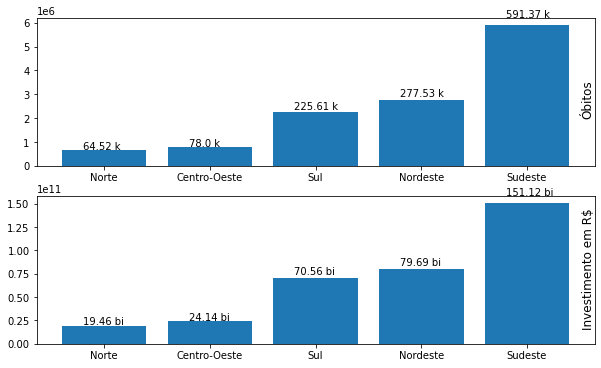

In [33]:
#@title
fig, (ax,ax2) = plt.subplots(2, figsize=(10,6))
ax.set_title('Óbitos', loc='right', y=-0.1, pad=65.0, rotation = 90.0)
ax.bar(obitos.groupby(['Região']).sum().T.sum().sort_values().keys(),\
       obitos.groupby(['Região']).sum().T.sum().sort_values())

col = (obitos.groupby(['Região']).sum().T.sum().sort_values().keys())
val = (obitos.groupby(['Região']).sum().T.sum().sort_values().values)

#É usado ZIP para fazer a tupla com os dados de coluna e seu valor de maneira agregada
result = zip(col, val)
result = (tuple(result))
result

c = 0
for i in result:
  #Para inserir o rótulo de dados de cada uma das barras
  ax.annotate(str((val[c]/10000).round(2))+' k',xy=(c-0.2, val[c]*1.05))
  c+=1

ax2.set_title('Investimento em R$', loc='right', y=-0.1, pad=32.0, rotation = 90.0)
ax2.bar(investimento.groupby(['Região']).sum().T.sum().sort_values().keys(),\
       investimento.groupby(['Região']).sum().T.sum().sort_values())

col = (investimento.groupby(['Região']).sum().T.sum().sort_values().keys())
val = (investimento.groupby(['Região']).sum().T.sum().sort_values().values)

result = zip(col, val)
result = (tuple(result))
result

c = 0
for i in result:
  #Para inserir o rótulo de dados de cada uma das barras
  ax2.annotate(str((val[c]/1000000000).round(2))+' bi',xy=(c-0.2, val[c]*1.05))
  c+=1

plt.show()

**Anos**

### Análise por região/estado

**Nordeste:**

> Maranhão e e Sergipe apresentaram uma concentração elevada de óbitos. Estes comportamentos não foram seguidos por nenhum dos estados da mesma região. 

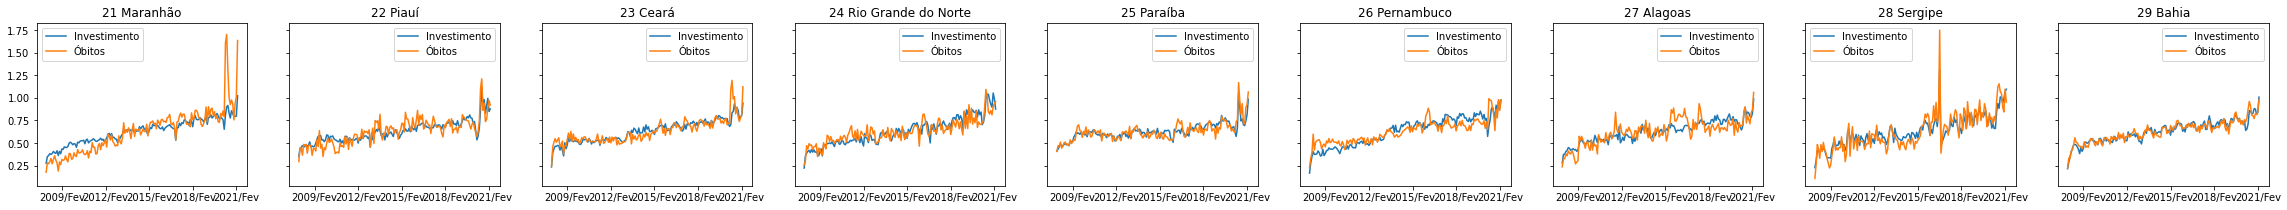

In [34]:
#@title
graficos_regiao('Nordeste')

**Estado em foco**

Maranhão:

No mês de maio de 2020, a quantidade de Óbitos praticamente dobrou, passando de 900 (abril) para 1826 e 1933 nos meses  seguintes. O mesmo aconteceu depois de fevereiro de 2021. Desta vez, valor passou de 1.150 (fevereiro) para 1.856 em março. 

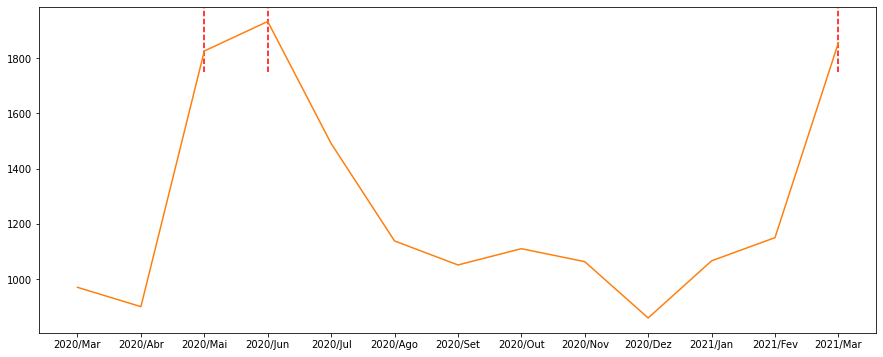

In [35]:
#@title
fig, ax = plt.subplots(figsize=(15,6))
n = obitos.T['21 Maranhão'][-15:-2]
# O pontos do eixo X a serem destacados, Valor máximo da linha, Valor mínimo da linha
ax.axes.vlines([2,3,12], 1750, n.max()+50, linestyles='--', color = 'r')
ax.plot(n, color='tab:orange')
plt.show()

**Norte:**

> Na parte final de cada um dos gráfico, há um aumento no número de óbitos. O que chama a atenção é a queda acentuada no volume de investimento e óbitos que ocorre nos últimos messes de Tocantins

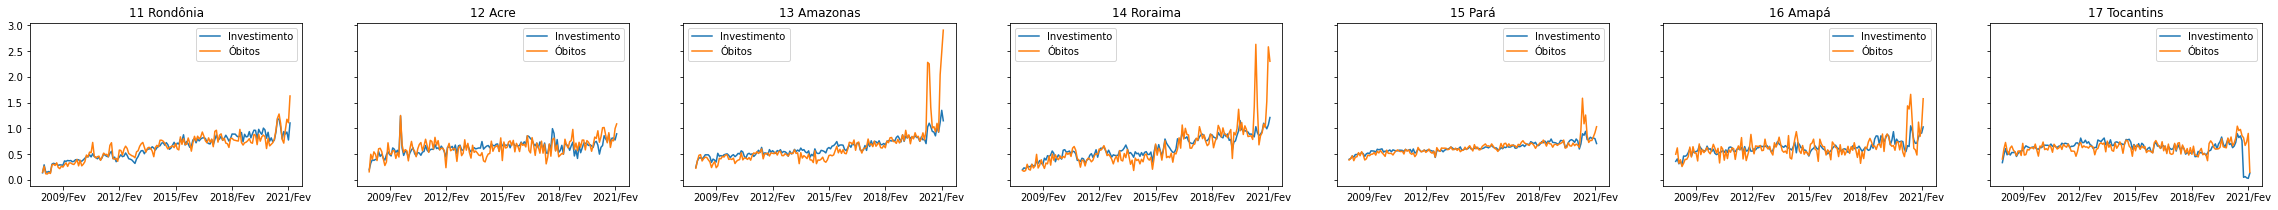

In [36]:
#@title
graficos_regiao('Norte')

**Estado em foco**

Tocantins:

Em Tocantins, o volume de investimento caiu drásticamente entre novembro de 2020 e fevereiro de 2021, valores muito abaixo da mínima histórica. O mesmo ocorreu com o número de óbitos em março de 2021. Sendo assim, podemos crer que houve algum erro na coleta das informações. 

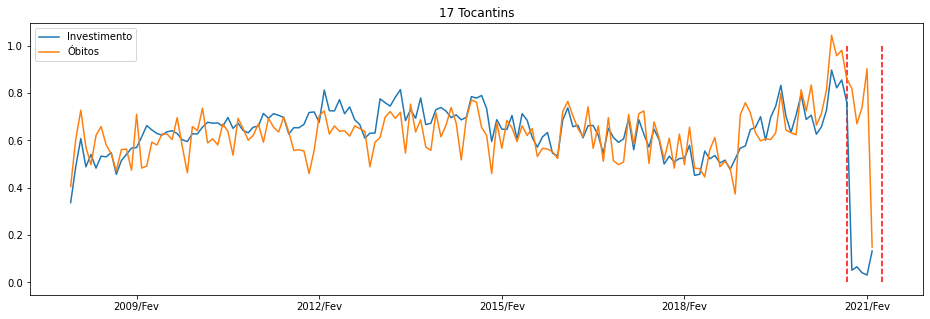

In [37]:
#@title
n = graficos_estado('17 Tocantins')
n.axes.vlines([153, 160],1, 0, linestyles='--', color = 'r')

Últimos dez meses (Tocantins):

In [38]:
#@title
mes_a_mes('17 Tocantins').tail(10)

,mês,obts,obts %,inv,inv %
149,2020/Jun,283,0.01,7424637.88,0.01
150,2020/Jul,363,0.01,9155572.36,0.01
151,2020/Ago,333,0.01,8390267.72,0.01
152,2020/Set,341,0.01,8729632.49,0.01
153,2020/Out,299,0.01,7770885.66,0.01
154,2020/Nov,285,0.01,527840.46,0.00
155,2020/Dez,233,0.01,675277.05,0.00
156,2021/Jan,257,0.01,419553.49,0.00
157,2021/Fev,314,0.01,319160.87,0.00
158,2021/Mar,52,0.00,1357751.33,0.00


**Sul:**

> Entre os estados do Sul do país, o Paraná foi o que recebeu o que se destadou por manter a proporção de investimento acima da proporção de óbitos nos meses 

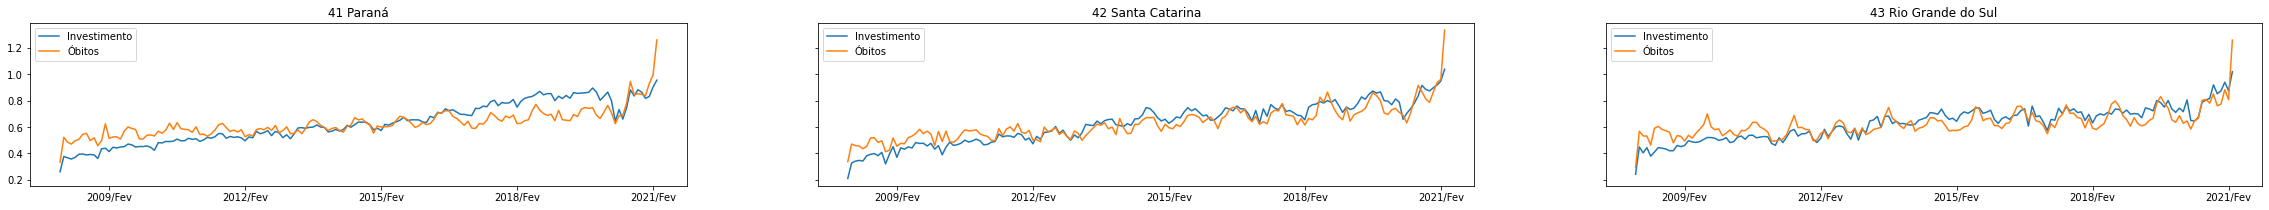

In [39]:
#@title
graficos_regiao('Sul')

**Estado em foco**

Paraná:

O destaque positivo entre os estados da região Sul está o estado do Paraná, que recebeu investimento acima do número de óbitos no período entreo Agosto de 2015 e abril de 2020.

Text(95, 0.99, 'Período de investimento maior do que óbitos (%)')

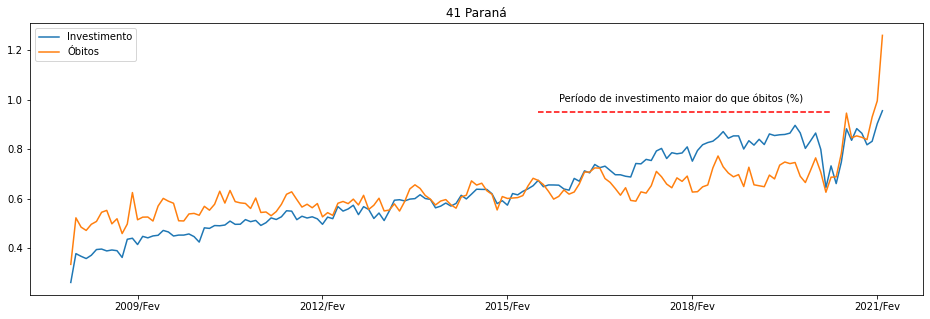

In [40]:
#@title
n = graficos_estado('41 Paraná')
n.axes.hlines([0.95], 91, 148, linestyles='--', color = 'r')
n.text(95,0.99,'Período de investimento maior do que óbitos (%)')

**Sudeste:**

> Os estados da região sudeste apresentaram linhas equilibradas entre investimento e óbitos ao longo dos anos. Assim como ocorreu nos outros estados, os últimos 6 meses observados registradaram o início de uma ascensão nas duas variáveis. 

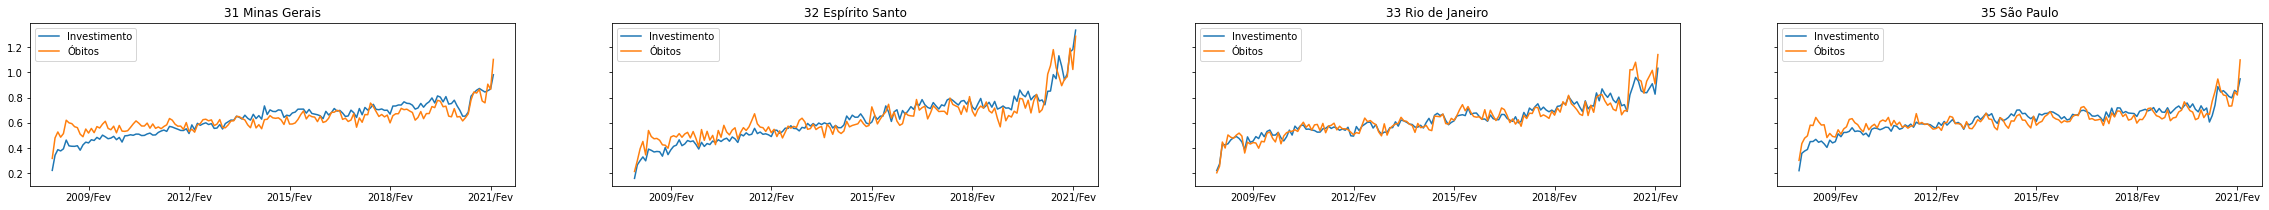

In [41]:
#@title
graficos_regiao('Sudeste')

**Centro-Oeste:**

> Estas últimas três regiões exibiram um volume equilibrado entre as duas variáveis apresentadas para cada um de seus estados. Destaque para a curva de Investimento do Paraná, que passou a ser mais 

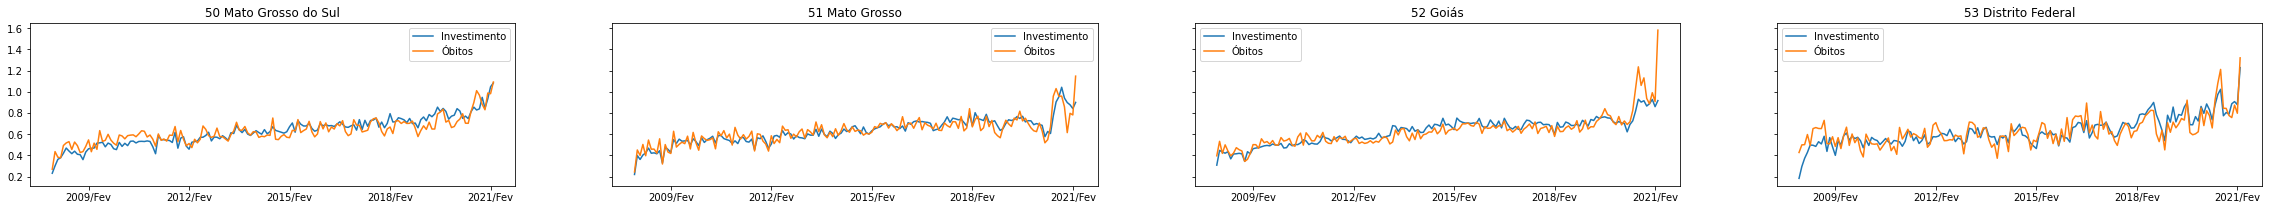

In [42]:
#@title
graficos_regiao('Centro-Oeste')

**Estado em foco**

Goiás:

A partir de junho de 2020, o número de óbitos no estado de Goiás exibiu um crescimento no volume de casos, chegando até 2.248 casos em Março de 2021, sendo que a média até junho do ano anterior era de 841.

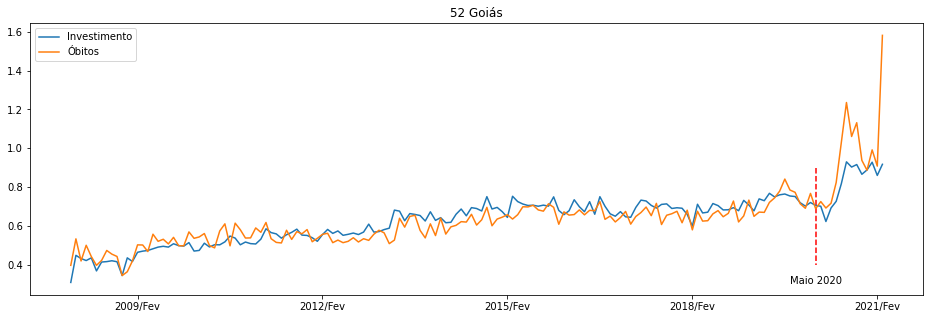

In [43]:
#@title
n = graficos_estado('52 Goiás')
n.text(140,0.3,'Maio 2020')
n.vlines(145, 0.90, 0.4, linestyles='--', color = 'r')

## Conclusão

Embora a maior parte dos estados apresente um acompanhamento similar ao volume de de óbitos, observamos que a velocidade com que as mortes estão subindo nos últimos meses de 2020 e início de 2020 poderão exigir um esforçço financeiramente inviável para os cofres de cada um dos estados.